In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

##**1 - Business Problem**

___Predicting turbine energy yield (TEY) using ambient variables as features___



##**2 - Data collection and description**

In [2]:
data=pd.read_csv("/content/gas_turbines.csv")

In [5]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [7]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
data.shape

(15039, 11)

In [10]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [11]:
data['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [12]:
len(data['TEY'].unique())

4207

In [13]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [14]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


##**Outlier Check**

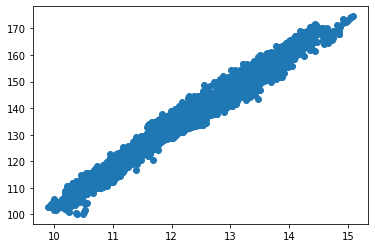

In [15]:
plt.scatter(x="CDP",y="TEY",data=data) #which is linerly co-related

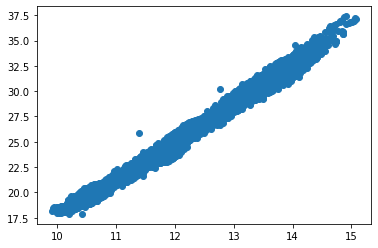

In [16]:
plt.scatter(x="CDP",y="GTEP",data=data)#which is linerly co-related

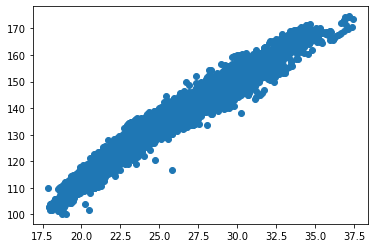

In [17]:
plt.scatter(x="GTEP",y="TEY",data=data)#which is linerly co-related

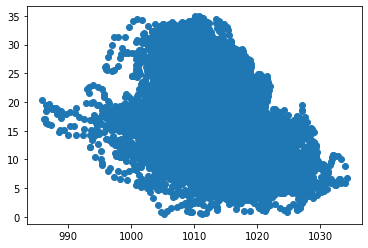

In [18]:
plt.scatter(x="AP",y="AT",data=data)# negtively corelated

<Axes: >

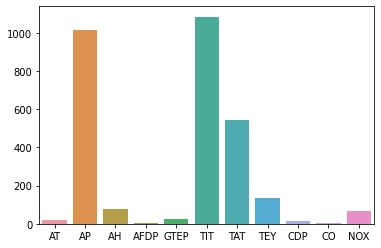

In [19]:
sns.barplot(data=data)


<Axes: >

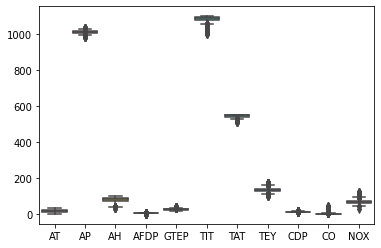

In [21]:
sns.boxplot(data=data)

(array([[15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            29., 15010.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 15039.],
        [    0.,     0.,     0.,     0., 14896.,   143.,     0.,     0.,
             0.,     0.],
        [  837., 14202.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [1

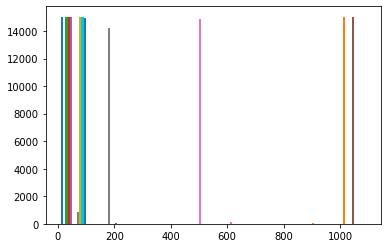

In [22]:
plt.hist(data)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

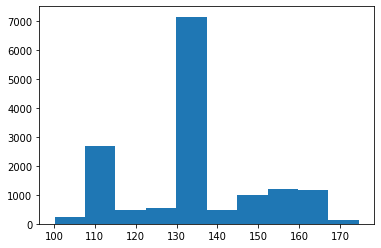

In [23]:
plt.hist(data['TEY'])

(array([5.000e+00, 1.000e+00, 5.000e+01, 1.630e+02, 3.690e+02, 2.064e+03,
        6.780e+02, 4.960e+02, 4.906e+03, 6.307e+03]),
 array([1000.8, 1010.8, 1020.8, 1030.8, 1040.8, 1050.8, 1060.8, 1070.8,
        1080.8, 1090.8, 1100.8]),
 <BarContainer object of 10 artists>)

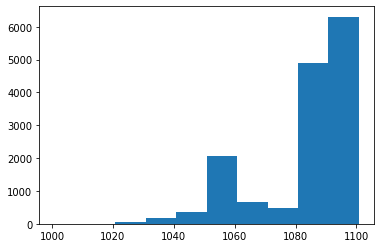

In [24]:
plt.hist(data['TIT'])

In [80]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

<ipython-input-82-553c7055833d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],color='g',shade=True)
<ipython-input-82-553c7055833d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],color='g',shade=True)
<ipython-input-82-553c7055833d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],color='g',shade=True)
<ipython-input-82-553c7055833d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],color='g',shade=True)
<ipython-input-82-553c7055833d>:4: FutureWarning: 



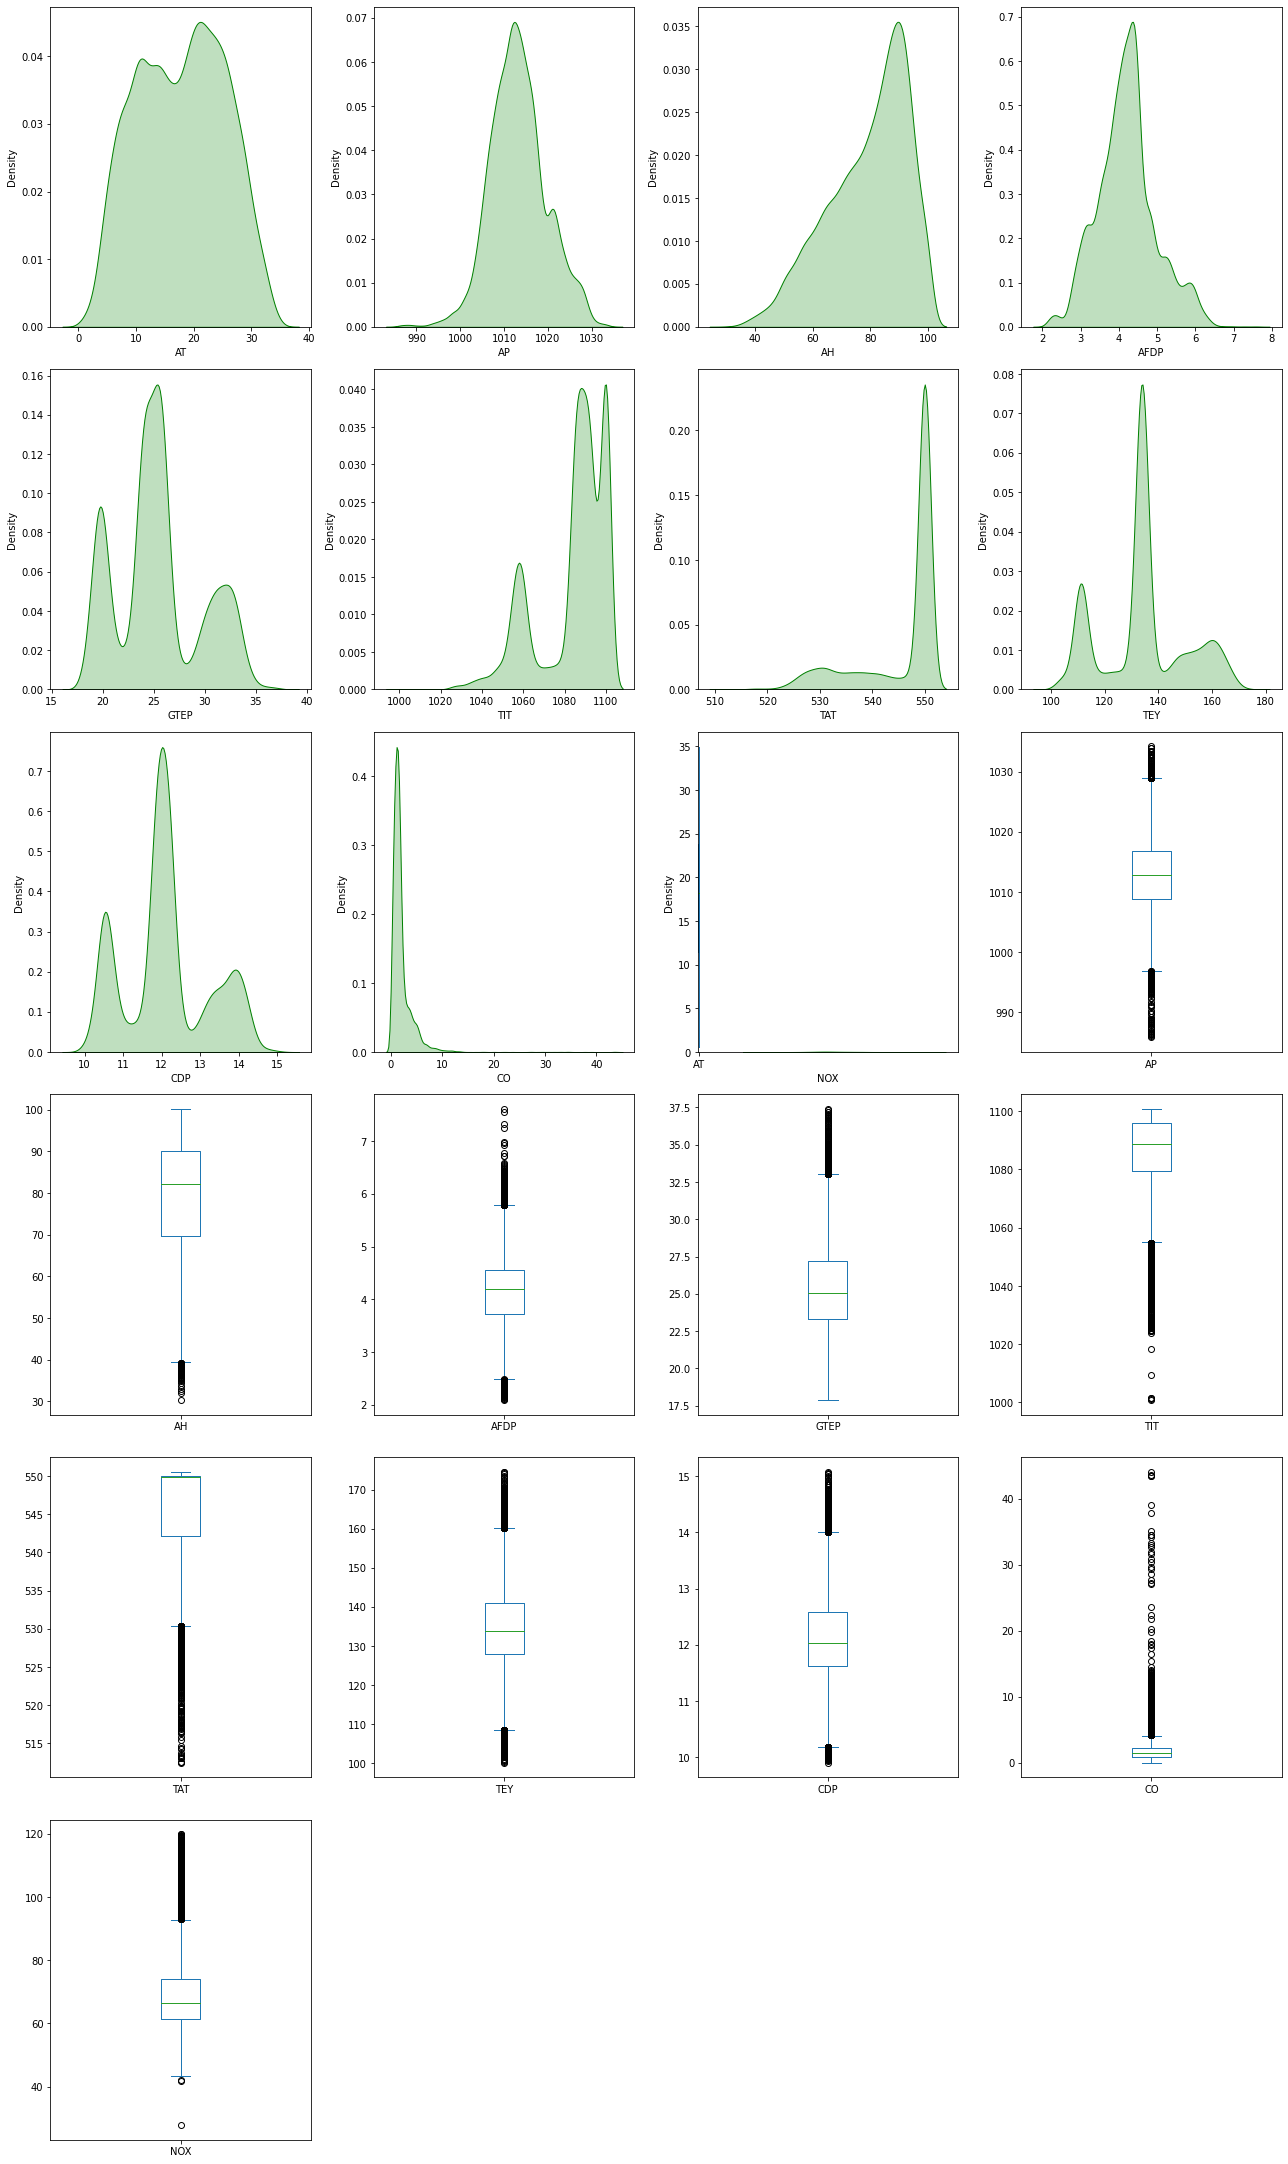

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577,1.126605
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116,2.660381


In [82]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [76]:
corr = data[data.columns[0:11]].corr()

<Axes: >

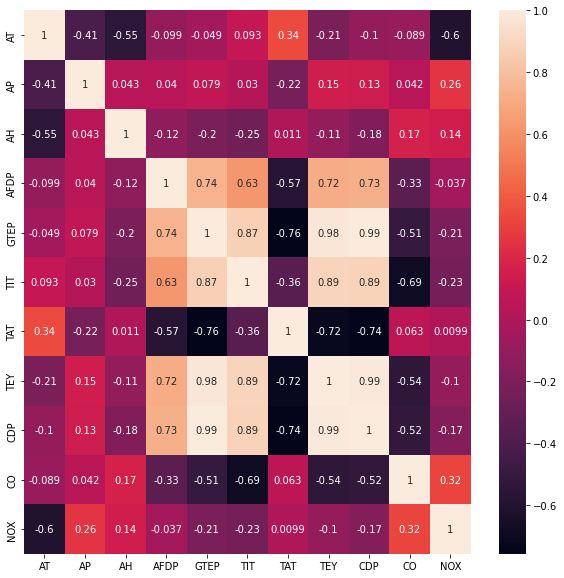

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow
import tensorflow as tf
from tensorflow import keras

##**3 - Neural Network Model**


In [62]:
mapping = {'small': 1, 'large': 2}

In [61]:
data = data.replace(mapping)

In [63]:
X=data.drop(columns =['TEY'])
y=data['TEY']

In [64]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [65]:
X_norm = norm_func(X)

In [66]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)


In [67]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [45]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=5, batch_size=30,verbose=1)

Epoch 1/5
351/351 [==============================] - 1s 2ms/step - loss: 1045.3578 - accuracy: 0.0000e+00
Epoch 2/5
351/351 [==============================] - 1s 2ms/step - loss: 1045.3578 - accuracy: 0.0000e+00
Epoch 3/5
351/351 [==============================] - 1s 2ms/step - loss: 1045.3571 - accuracy: 0.0000e+00
Epoch 4/5
351/351 [==============================] - 1s 2ms/step - loss: 1045.3572 - accuracy: 0.0000e+00
Epoch 5/5
351/351 [==============================] - 1s 2ms/step - loss: 1045.3566 - accuracy: 0.0000e+00


In [70]:
model.evaluate(X_test,y_test)


141/141 [==============================] - 0s 1ms/step - loss: 1042.9396 - accuracy: 0.0000e+00


[1042.9395751953125, 0.0]

In [71]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))


329/329 [==============================] - 1s 1ms/step - loss: 1045.3574 - accuracy: 0.0000e+00
Accuracy: 0.00


In [72]:
optmizer =RMSprop(0.5)#0.01 is a learning rate
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])


In [73]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
1053/1053 [==============================] - 2s 2ms/step - loss: 25209.1367 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6201 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6484 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6338 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6094 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6621 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.5820 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6562 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6348 - accuracy: 0.0000e+00
Epoch 10/1

##**4 - Conclusion**

In [74]:
model.evaluate(X_test,y_test)


141/141 [==============================] - 0s 1ms/step - loss: 15956.8740 - accuracy: 0.0000e+00


[15956.8740234375, 0.0]

In [75]:
predictions =np.argmax(model.predict(X_train), axis=-1)

329/329 [==============================] - 0s 1ms/step
